In [1]:
from IPython.display import display, Math, Latex, HTML, Image

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.causal as csl
import pyAgrum.causal.notebook as cslnb

<h1>CAUSAL GRAPH</h1>

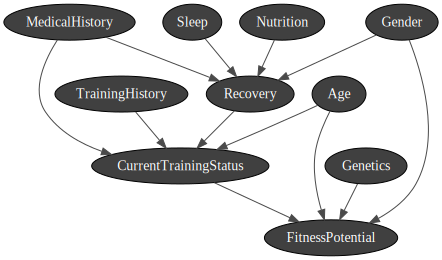

In [2]:
#construct network
m1 = gum.fastBN("TrainingHistory{consistent|inconsistent}->CurrentTrainingStatus{consistent|inconsistent}<-Age{below 29|30 - 49|above 50}->FitnessPotential{positive|negative}<-Genetics{elite|normal};FitnessPotential{positive|negative}<-Gender{male|female}->Recovery{sufficient|insufficient}<-Sleep{below 6h|over or at 6h};Nutrition{goal-oriented|mindless}->Recovery{sufficient|insufficient}<-MedicalHistory{outstanding|poor}->CurrentTrainingStatus{consistent|inconsistent}->FitnessPotential{positive|negative};CurrentTrainingStatus{consistent|inconsistent}<-Recovery{sufficient|insufficient}")

#show network with random cpts
gnb.showBN(m1,20)

<h1>PROBABILITIES</h1>

In [3]:
m1.cpt("MedicalHistory")[:]=[0.9,0.1]
m1.cpt("Sleep")[:]=[0.55,0.45]
m1.cpt("Nutrition")[:]=[0.25,0.75]
m1.cpt("Gender")[:]=[0.85,0.15]
m1.cpt("Age")[:]=[0.65,0.20,0.15]
m1.cpt("Genetics")[:]=[0.05,0.95]
m1.cpt("TrainingHistory")[:]=[0.25,0.75]
gnb.sideBySide(m1.cpt("MedicalHistory"),m1.cpt("Sleep"),m1.cpt("Nutrition"), m1.cpt("Gender"))
gnb.sideBySide(m1.cpt("Age"), m1.cpt("Genetics"),m1.cpt("TrainingHistory"))

In [4]:
m1.cpt("Recovery")[{'MedicalHistory':'outstanding','Nutrition':'goal-oriented', 'Sleep':'below 6h', 'Gender': 'male'}]=[0.45,0.55]
m1.cpt("Recovery")[{'MedicalHistory':'outstanding','Nutrition':'goal-oriented', 'Sleep':'below 6h', 'Gender': 'female'}]=[0.55,0.45]
m1.cpt("Recovery")[{'MedicalHistory':'outstanding','Nutrition':'goal-oriented', 'Sleep':'over or at 6h', 'Gender': 'male'}]=[0.85,0.15]
m1.cpt("Recovery")[{'MedicalHistory':'outstanding','Nutrition':'goal-oriented', 'Sleep':'over or at 6h', 'Gender': 'female'}]=[0.95,0.05]
m1.cpt("Recovery")[{'MedicalHistory':'outstanding','Nutrition':'mindless', 'Sleep':'below 6h', 'Gender': 'male'}]=[0.40,0.60]
m1.cpt("Recovery")[{'MedicalHistory':'outstanding','Nutrition':'mindless', 'Sleep':'below 6h', 'Gender': 'female'}]=[0.45,0.55]
m1.cpt("Recovery")[{'MedicalHistory':'outstanding','Nutrition':'mindless', 'Sleep':'over or at 6h', 'Gender': 'male'}]=[0.75,0.25]
m1.cpt("Recovery")[{'MedicalHistory':'outstanding','Nutrition':'mindless', 'Sleep':'over or at 6h', 'Gender': 'female'}]=[0.85,0.15]
m1.cpt("Recovery")[{'MedicalHistory':'poor','Nutrition':'goal-oriented', 'Sleep':'below 6h', 'Gender': 'male'}]=[0.65,0.35]
m1.cpt("Recovery")[{'MedicalHistory':'poor','Nutrition':'goal-oriented', 'Sleep':'below 6h', 'Gender': 'female'}]=[0.75,0.25]
m1.cpt("Recovery")[{'MedicalHistory':'poor','Nutrition':'goal-oriented', 'Sleep':'over or at 6h', 'Gender': 'male'}]=[0.70,0.30]
m1.cpt("Recovery")[{'MedicalHistory':'poor','Nutrition':'goal-oriented', 'Sleep':'over or at 6h', 'Gender': 'female'}]=[0.75,0.25]
m1.cpt("Recovery")[{'MedicalHistory':'poor','Nutrition':'mindless', 'Sleep':'below 6h', 'Gender': 'male'}]=[0.25,0.75]
m1.cpt("Recovery")[{'MedicalHistory':'poor','Nutrition':'mindless', 'Sleep':'below 6h', 'Gender': 'female'}]=[0.30,0.70]
m1.cpt("Recovery")[{'MedicalHistory':'poor','Nutrition':'mindless', 'Sleep':'over or at 6h', 'Gender': 'male'}]=[0.30,0.70]
m1.cpt("Recovery")[{'MedicalHistory':'poor','Nutrition':'mindless', 'Sleep':'over or at 6h', 'Gender': 'female'}]=[0.35,0.65]

gnb.sideBySide(m1.cpt("Recovery"))

In [5]:
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'male','Genetics':'elite', 'Age':'below 29'}]=[0.995,0.005]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'male','Genetics':'elite', 'Age':'30 - 49'}]=[0.65,0.35]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'male','Genetics':'elite', 'Age':'above 50'}]=[0.25,0.75]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'male','Genetics':'normal', 'Age':'below 29'}]=[0.90,0.1]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'male','Genetics':'normal', 'Age':'30 - 49'}]=[0.50,0.50]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'male','Genetics':'normal', 'Age':'above 50'}]=[0.15,0.85]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'female','Genetics':'elite', 'Age':'below 29'}]=[0.9,0.10]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'female','Genetics':'elite', 'Age':'30 - 49'}]=[0.50,0.50]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'female','Genetics':'elite', 'Age':'above 50'}]=[0.15,0.85]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'female','Genetics':'normal', 'Age':'below 29'}]=[0.70,0.3]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'female','Genetics':'normal', 'Age':'30 - 49'}]=[0.40,0.60]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'female','Genetics':'normal', 'Age':'above 50'}]=[0.10,0.90]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'male','Genetics':'elite', 'Age':'below 29'}]=[0.90,0.1]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'male','Genetics':'elite', 'Age':'30 - 49'}]=[0.60,0.40]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'male','Genetics':'elite', 'Age':'above 50'}]=[0.20,0.8]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'male','Genetics':'normal', 'Age':'below 29'}]=[0.85,0.15]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'male','Genetics':'normal', 'Age':'30 - 49'}]=[0.45,0.55]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'male','Genetics':'normal', 'Age':'above 50'}]=[0.10,0.90]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'female','Genetics':'elite', 'Age':'below 29'}]=[0.85,0.15]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'female','Genetics':'elite', 'Age':'30 - 49'}]=[0.45,0.55]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'female','Genetics':'elite', 'Age':'above 50'}]=[0.10,0.9]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'female','Genetics':'normal', 'Age':'below 29'}]=[0.65,0.35]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'female','Genetics':'normal', 'Age':'30 - 49'}]=[0.35,0.65]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'female','Genetics':'normal', 'Age':'above 50'}]=[0.05,0.95]

gnb.sideBySide(m1.cpt("CurrentTrainingStatus"))

In [6]:
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'male','Genetics':'elite', 'Age':'below 29'}]=[0.995,0.005]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'male','Genetics':'elite', 'Age':'30 - 49'}]=[0.65,0.35]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'male','Genetics':'elite', 'Age':'above 50'}]=[0.25,0.75]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'male','Genetics':'normal', 'Age':'below 29'}]=[0.90,0.1]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'male','Genetics':'normal', 'Age':'30 - 49'}]=[0.50,0.50]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'male','Genetics':'normal', 'Age':'above 50'}]=[0.15,0.85]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'female','Genetics':'elite', 'Age':'below 29'}]=[0.9,0.10]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'female','Genetics':'elite', 'Age':'30 - 49'}]=[0.50,0.50]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'female','Genetics':'elite', 'Age':'above 50'}]=[0.15,0.85]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'female','Genetics':'normal', 'Age':'below 29'}]=[0.70,0.3]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'female','Genetics':'normal', 'Age':'30 - 49'}]=[0.40,0.60]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Gender':'female','Genetics':'normal', 'Age':'above 50'}]=[0.10,0.90]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'male','Genetics':'elite', 'Age':'below 29'}]=[0.90,0.1]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'male','Genetics':'elite', 'Age':'30 - 49'}]=[0.60,0.40]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'male','Genetics':'elite', 'Age':'above 50'}]=[0.20,0.8]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'male','Genetics':'normal', 'Age':'below 29'}]=[0.85,0.15]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'male','Genetics':'normal', 'Age':'30 - 49'}]=[0.45,0.55]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'male','Genetics':'normal', 'Age':'above 50'}]=[0.10,0.90]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'female','Genetics':'elite', 'Age':'below 29'}]=[0.85,0.15]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'female','Genetics':'elite', 'Age':'30 - 49'}]=[0.45,0.55]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'female','Genetics':'elite', 'Age':'above 50'}]=[0.10,0.9]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'female','Genetics':'normal', 'Age':'below 29'}]=[0.65,0.35]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'female','Genetics':'normal', 'Age':'30 - 49'}]=[0.35,0.65]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Gender':'female','Genetics':'normal', 'Age':'above 50'}]=[0.05,0.95]

gnb.sideBySide(m1.cpt("FitnessPotential"))

<h1>CAUSAL INFERENCE</h1>

<h3>Causal Effect of <i>CurrentTrainingStatus</i> on <i>FitnessPotential</i></h3>

In [7]:
cm1 = csl.CausalModel(m1)
cslnb.showCausalImpact(cm1, "FitnessPotential", "CurrentTrainingStatus")

In [8]:
ci1 = csl.causalImpact(cm1,on="FitnessPotential",doing="CurrentTrainingStatus",values={"FitnessPotential":"positive"})[1]
ACE1 = ci1[0]-ci1[1]
ACE1

0.051243124999999945

<h3> <i> Age</i>-specific effect of <i> CurrentTrainingStatus </i> on <i> FitnessPotential </i>

In [9]:
ie=gum.LazyPropagation(m1)
ie.addJointTarget({"CurrentTrainingStatus","FitnessPotential","Age"})
ie.makeInference()
pFPgivenCTSA=ie.evidenceJointImpact(["FitnessPotential"],["CurrentTrainingStatus","Age"])
gnb.sideBySide(pFPgivenCTSA)

<h3> Mediating Variable</h3>

<h4> CDE of <i> <u>MedicalHistory</u> </i> on <i> CurrentTrainingStatus </i> mediating through <i> Recovery </i> </h4>

In [10]:
cslnb.showCausalImpact(cm1,on={"CurrentTrainingStatus"},doing={"MedicalHistory","Recovery"})

In [11]:
ci_poor = csl.causalImpact(cm1,on={"CurrentTrainingStatus"},doing={"MedicalHistory","Recovery"},values={"MedicalHistory":'poor', "Recovery": 'insufficient'})[1][1]
ci_outstanding = csl.causalImpact(cm1,on={"CurrentTrainingStatus"},doing={"MedicalHistory","Recovery"},values={"MedicalHistory":'outstanding', "Recovery": 'insufficient'})[1][0]

CDE = ci_outstanding - ci_poor
CDE

0.005394622000028493

<h1> SIMULATION </h1>

<i> Making <b> Gender </b> unmeasurable

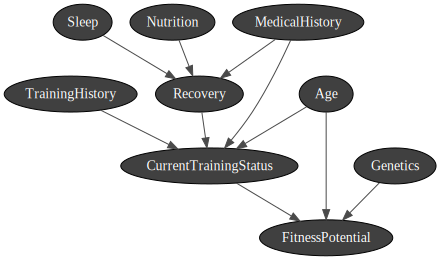

In [12]:
m1 = gum.fastBN("TrainingHistory{consistent|inconsistent}->CurrentTrainingStatus{consistent|inconsistent}<-Age{below 29|30 - 49|above 50}->FitnessPotential{positive|negative}<-Genetics{elite|normal};Recovery{sufficient|insufficient}<-Sleep{below 6h|over or at 6h};Nutrition{goal-oriented|mindless}->Recovery{sufficient|insufficient}<-MedicalHistory{outstanding|poor}->CurrentTrainingStatus{consistent|inconsistent}->FitnessPotential{positive|negative};CurrentTrainingStatus{consistent|inconsistent}<-Recovery{sufficient|insufficient}")
gnb.showBN(m1,20)

In [13]:
m1.cpt("Recovery")[{'MedicalHistory':'outstanding','Nutrition':'goal-oriented', 'Sleep':'below 6h'}]=[0.65,0.35]
m1.cpt("Recovery")[{'MedicalHistory':'outstanding','Nutrition':'goal-oriented', 'Sleep':'over or at 6h'}]=[0.95,0.05]
m1.cpt("Recovery")[{'MedicalHistory':'outstanding','Nutrition':'mindless', 'Sleep':'below 6h'}]=[0.60,0.4]
m1.cpt("Recovery")[{'MedicalHistory':'outstanding','Nutrition':'mindless', 'Sleep':'over or at 6h'}]=[0.85,0.15]
m1.cpt("Recovery")[{'MedicalHistory':'poor','Nutrition':'goal-oriented', 'Sleep':'below 6h'}]=[0.30,0.7]
m1.cpt("Recovery")[{'MedicalHistory':'poor','Nutrition':'goal-oriented', 'Sleep':'over or at 6h'}]=[0.75,0.25]
m1.cpt("Recovery")[{'MedicalHistory':'poor','Nutrition':'mindless', 'Sleep':'below 6h'}]=[0.25,0.75]
m1.cpt("Recovery")[{'MedicalHistory':'poor','Nutrition':'mindless', 'Sleep':'over or at 6h'}]=[0.65,0.35]



gnb.sideBySide(m1.cpt("Recovery"))

In [14]:
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Genetics':'elite', 'Age':'below 29'}]=[0.995,0.005]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Genetics':'elite', 'Age':'30 - 49'}]=[0.65,0.35]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Genetics':'elite', 'Age':'above 50'}]=[0.25,0.75]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Genetics':'normal', 'Age':'below 29'}]=[0.70,0.3]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Genetics':'normal', 'Age':'30 - 49'}]=[0.40,0.60]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'consistent','Genetics':'normal', 'Age':'above 50'}]=[0.10,0.90]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Genetics':'elite', 'Age':'below 29'}]=[0.90,0.1]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Genetics':'elite', 'Age':'30 - 49'}]=[0.60,0.40]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Genetics':'elite', 'Age':'above 50'}]=[0.20,0.8]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Genetics':'normal', 'Age':'below 29'}]=[0.65,0.35]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Genetics':'normal', 'Age':'30 - 49'}]=[0.35,0.65]
m1.cpt("FitnessPotential")[{'CurrentTrainingStatus':'inconsistent','Genetics':'normal', 'Age':'above 50'}]=[0.05,0.95]

gnb.sideBySide(m1.cpt("FitnessPotential"))

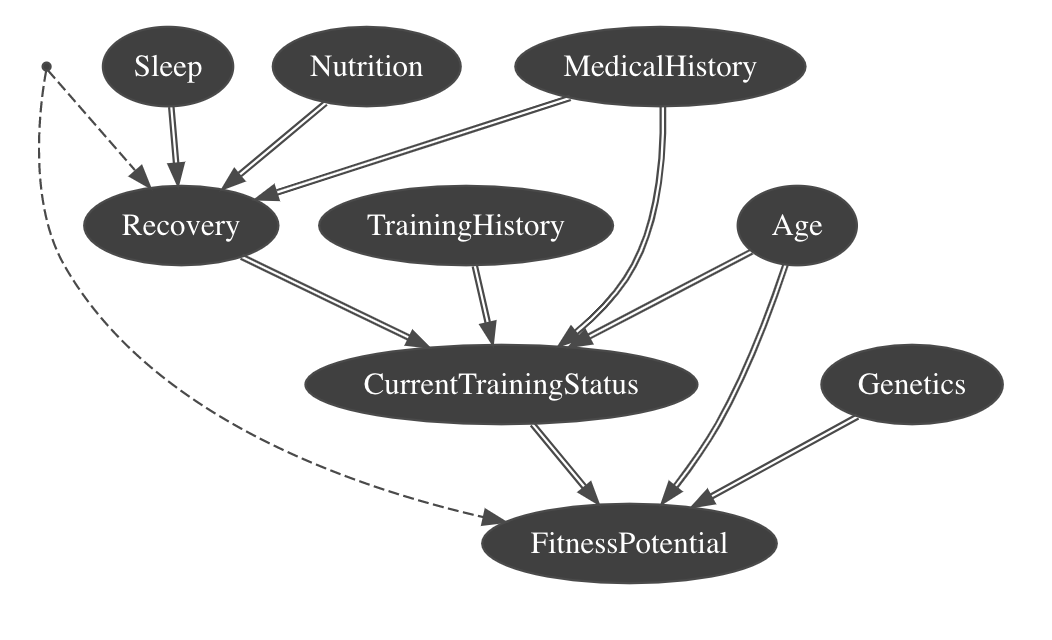

In [15]:
cm3 = csl.CausalModel(m1, [("Gender", ["Recovery","FitnessPotential"])], keepArcs=True)
Image(filename='./withoutGender.png')

<h3>Causal Effect of <i>CurrentTrainingStatus</i> on <i>FitnessPotential</i> </h3>

In [16]:
cslnb.showCausalImpact(cm3, "FitnessPotential", "CurrentTrainingStatus")

In [17]:
ci2 = csl.causalImpact(cm1,on="FitnessPotential",doing="CurrentTrainingStatus",values={"FitnessPotential":"negative"})[1]
ACE2 = ci2[1]-ci2[0]
ACE2

0.051243124999999945

<h3> <i> Age</i>-specific effect of <i> CurrentTrainingStatus </i> on <i> FitnessPotential </i>

In [18]:
ie=gum.LazyPropagation(m1)
ie.addJointTarget({"CurrentTrainingStatus","FitnessPotential","Age"})
ie.makeInference()
pFPgivenCTSA=ie.evidenceJointImpact(["FitnessPotential"],["CurrentTrainingStatus","Age"])
gnb.sideBySide(pFPgivenCTSA)

<h3> Mediating Variable</h3>

<h4> CDE of <i> <u>MedicalHistory</u> </i> on <i> CurrentTrainingStatus </i> mediating through <i> Recovery </i> </h4>

In [19]:
cslnb.showCausalImpact(cm3,on={"CurrentTrainingStatus"},doing={"MedicalHistory","Recovery"})

In [20]:
ci_poor2 = csl.causalImpact(cm3,on={"CurrentTrainingStatus"},doing={"MedicalHistory","Recovery"},values={"MedicalHistory":'poor', "Recovery": 'insufficient'})[1][1]
ci_outstanding2 = csl.causalImpact(cm3,on={"CurrentTrainingStatus"},doing={"MedicalHistory","Recovery"},values={"MedicalHistory":'outstanding', "Recovery": 'insufficient'})[1][0]

CDE2 = ci_outstanding2 - ci_poor2
CDE2

0.35415922228943786